# I. 3D model

In [1]:
from simple_maize import *
from plant_design import polym_integral_rel
from matplotlib.pylab import plot, show, xlim, ylim, axes
import numpy
from TD_maize import maize,display,generate_mtg, illuminate,plant_irradiance, process
%pylab inline
pylab.rcParams['figure.figsize'] = (5, 5)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Parameters range are done in TD_sensitivity_Agreenium.R

## I.1 plant height

In [2]:
phytomer=16
nb_young_phy = int(round((phytomer - 1.95) / 1.84 / 1.3))
pseudostem_dist=1.4
pseudostem_height=20
stem_dist=1.
pseudostem = geometric_dist(height=pseudostem_height, nb_phy=nb_young_phy,q=pseudostem_dist)

plant_height_min=50
plant_height_max=300

stem_min = geometric_dist(height=plant_height_min - pseudostem_height,nb_phy=phytomer - nb_young_phy, q=stem_dist)
stem_max = geometric_dist(height=plant_height_max - pseudostem_height,nb_phy=phytomer - nb_young_phy, q=stem_dist)

stem_min,stem_max

([3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0],
 [28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0])

## I.2 Leaf area distribution along the stem

relative position of the leaf with highest area (rmax)

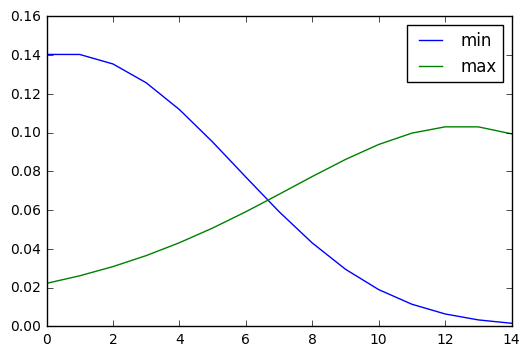

In [3]:
rmax_min=0.1
rmax_max=0.9
ymin=bell_shaped_dist(plant_area=1,nb_phy=15,rmax=rmax_min,skew=0.15)
ymax=bell_shaped_dist(plant_area=1,nb_phy=15,rmax=rmax_max,skew=0.15)
plot(ymin,label='min')
plot(ymax,label='max')
plt.legend(loc='best')
plt.show()


skewness of leaf area distribution (skew)

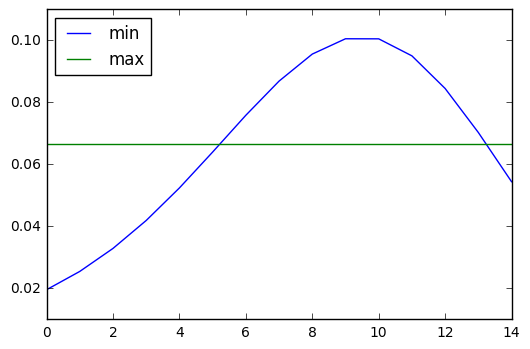

In [4]:
skew_min=0.05
skew_max=1
ymin=bell_shaped_dist(plant_area=1,nb_phy=15,rmax=0.7,skew=skew_min)
ymax=bell_shaped_dist(plant_area=1,nb_phy=15,rmax=0.7,skew=skew_max)
plot(ymin,label='min')
plot(ymax,label='max')
plt.legend(loc='best')
plt.show()

## I.3 leaf shape

### I.3.1 ratio widht/length (wl)

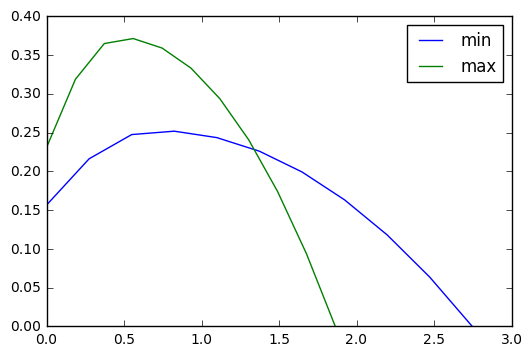

In [5]:
# fixed parameters
leaf_area=0.5
wl_int=0.08
w0_int=0.5
lm_int=0.5

# variables and parameters
leaf_rank=12

w0_slp=0.01
w0=w0_int+w0_slp*leaf_rank

lm_slp=-.02
lm=lm_int+lm_slp*leaf_rank

wl_slp_min=0.001
wl_min=wl_int+leaf_rank*wl_slp_min

wl_slp_max=0.01
wl_max=wl_int+leaf_rank*wl_slp_max

# leaf morpho
s,r=leaf_morpho_rel(nb_segment=10, w0=w0, lm=lm) #relative shape

# relative leaf area

area_rel_sim=polym_integral_rel(w0=w0, lm=lm)

l_min=sqrt(leaf_area/(area_rel_sim*wl_min))
w_min=l_min*wl_min
s_min,r_min=s*l_min,r*w_min

l_max=sqrt(leaf_area/(area_rel_sim*wl_max))
w_max=l_max*wl_max
s_max,r_max=s*l_max,r*w_max

plot(s_min,r_min,label='min')
plot(s_max,r_max,label='max')
plt.legend(loc='best')
plt.show()

### I.3.2 relative width at insertion

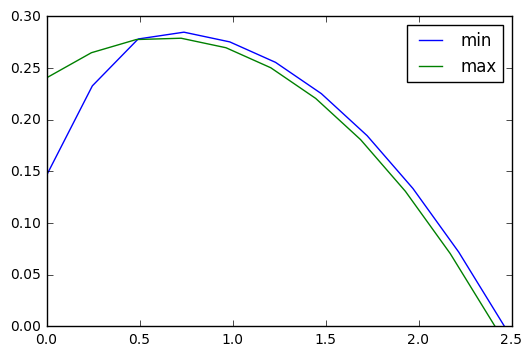

In [6]:
# fixed parameters
leaf_area=0.5
wl_int=0.08
w0_int=0.5
lm_int=0.5

# variables and parameters
leaf_rank=12

wl_slp=0.003
wl=wl_int+wl_slp*leaf_rank

lm_slp=-.02
lm=lm_int+lm_slp*leaf_rank

w0_slp_min=0.001
w0_min=w0_int+w0_slp_min*leaf_rank

w0_slp_max=0.03
w0_max=w0_int+w0_slp_max*leaf_rank


# leaf morpho
s_min,r_min=leaf_morpho_rel(w0=w0_min, lm=lm) #relative shape
s_max,r_max=leaf_morpho_rel(w0=w0_max, lm=lm) #relative shape

# relative leaf area

area_rel_sim_min=polym_integral_rel(w0=w0_min, lm=lm)
area_rel_sim_max=polym_integral_rel(w0=w0_max, lm=lm)

l_min=sqrt(leaf_area/(area_rel_sim_min*wl))
w_min=l_min*wl

l_max=sqrt(leaf_area/(area_rel_sim_max*wl))
w_max=l_max*wl

plot(s_min*l_min,r_min*w_min,label='min')
plot(s_max*l_max,r_max*w_max,label='max')
plt.legend(loc='best')
plt.show()

### I.3.2 relative position of the maximum width 

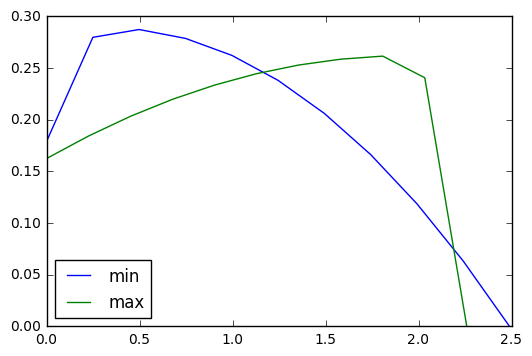

In [7]:
# fixed parameters
leaf_area=0.5
wl_int=0.08
w0_int=0.5
lm_int=0.5

# variables and parameters
leaf_rank=12
wl_slp=0.003
wl=wl_int+wl_slp*leaf_rank

w0_slp=0.01
w0=w0_int+w0_slp*leaf_rank

lm_slp_min=-.03
lm_min=lm_int+lm_slp_min*leaf_rank

lm_slp_max=0.03
lm_max=lm_int+lm_slp_max*leaf_rank

# leaf morpho
s_min,r_min=leaf_morpho_rel(w0=w0, lm=lm_min) #relative shape
s_max,r_max=leaf_morpho_rel(w0=w0, lm=lm_max) #relative shape

# relative leaf area

area_rel_sim_min=polym_integral_rel(w0=w0, lm=lm_min)
area_rel_sim_max=polym_integral_rel(w0=w0, lm=lm_max)

l_min=sqrt(leaf_area/(area_rel_sim_min*wl))
w_min=l_min*wl

l_max=sqrt(leaf_area/(area_rel_sim_max*wl))
w_max=l_max*wl

plot(s_min*l_min,r_min*w_min,label='min')
plot(s_max*l_max,r_max*w_max,label='max')
plt.legend(loc='best')
plt.show()

##  I.4 Leaf curvature

### II.4.1 Base function

In [8]:
x,y=leaf_shape_perez(nb_segment = 100,insertion_angle=50, l=0.5, infl=30)
x,y

(array([ 0.        ,  0.00383022,  0.00766089,  0.01149291,  0.01532716,
         0.01916454,  0.02300593,  0.02685224,  0.03070434,  0.0345631 ,
         0.03842941,  0.04230413,  0.04618812,  0.05008223,  0.05398731,
         0.0579042 ,  0.06183372,  0.06577668,  0.0697339 ,  0.07370615,
         0.07769422,  0.08169887,  0.08572085,  0.08976088,  0.09381968,
         0.09789794,  0.10199634,  0.10611551,  0.1102561 ,  0.1144187 ,
         0.11860389,  0.12281223,  0.12704423,  0.13130037,  0.13558113,
         0.13988693,  0.14421815,  0.14857514,  0.15295821,  0.15736763,
         0.16180362,  0.16626637,  0.17075599,  0.17527257,  0.17981612,
         0.18438661,  0.18898394,  0.19360796,  0.19825845,  0.2029351 ,
         0.20763757,  0.2123654 ,  0.21711807,  0.221895  ,  0.22669548,
         0.23151874,  0.23636391,  0.24123002,  0.24611598,  0.25102063,
         0.25594267,  0.26088069,  0.26583317,  0.27079844,  0.27577472,
         0.2807601 ,  0.2857525 ,  0.29074973,  0.2

### I.4.2 insertion angle

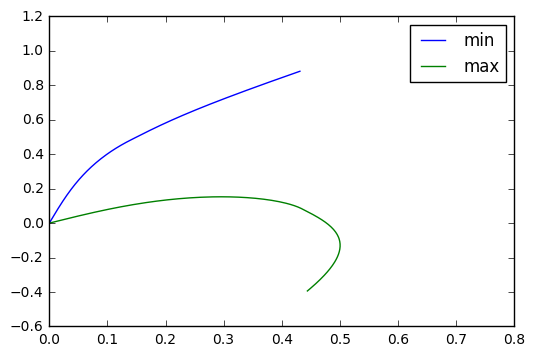

In [9]:
insertion_min=10
insertion_max=50

xmin,ymin=leaf_shape_perez(insertion_angle=insertion_min)
xmax,ymax=leaf_shape_perez(insertion_angle=insertion_max)
plot(xmin,ymin,label='min')
plot(xmax,ymax,label='max')
xlim(0,0.8)
ylim(-0.6,1.2)
plt.legend(loc='best')
plt.show()

### I.4.3 inflexion effect

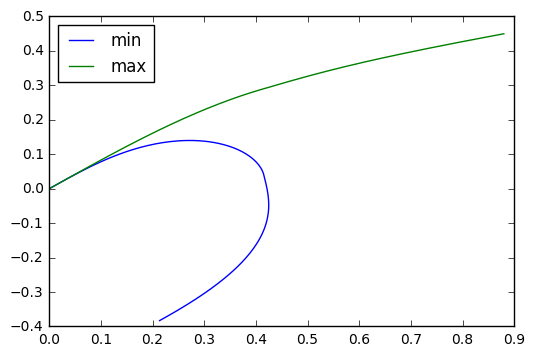

In [10]:
infl_min=10
infl_max=60

xmin,ymin=leaf_shape_perez( infl=infl_min)
xmax,ymax=leaf_shape_perez(infl=infl_max)
plot(xmin,ymin,label='min')
plot(xmax,ymax,label='max')
plt.legend(loc='best')
plt.show()

### I.4.4 Variation of curvature with leaf rank

In [11]:
def leaf_shape_rank(rank=1,nb_segment=100,incli_top=10, incli_base=70,l=0.5, infl=40):
    phytomer=16
    dinc = float(incli_top - incli_base) / (phytomer - 1)
    incli = incli_base + (rank -1) * dinc
    return leaf_shape_perez(nb_segment = 100,insertion_angle=incli, l=l, infl=infl)

#### Curvature of top leaf (rank16)

Variation of top leaf insertion (incli_top)

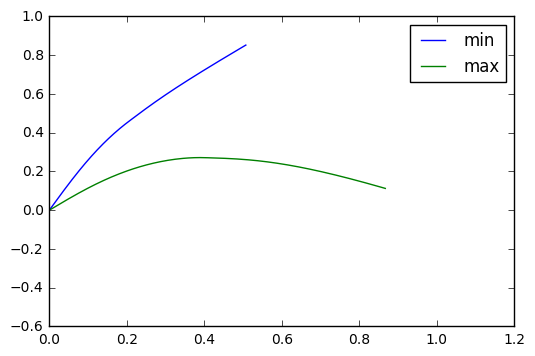

In [12]:
rank=16
incli_top_min=20
incli_top_max=40

x_min,y_min=leaf_shape_rank(rank=rank,incli_top=incli_top_min)
x_max,y_max=leaf_shape_rank(rank=rank,incli_top=incli_top_max)

plot(x_min,y_min,label='min')
plot(x_max,y_max,label='max')
xlim(0,1.2)
ylim(-0.6,1)
plt.legend(loc='best')
plt.show()


#### Curvature of base leaf (rank1)

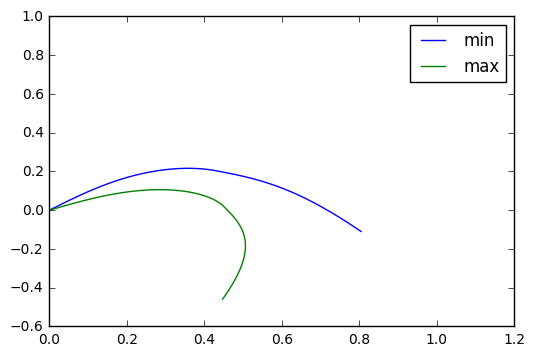

In [13]:
rank=1
incli_base_min=45
incli_base_max=60

x_min,y_min=leaf_shape_rank(rank=rank,incli_base=incli_base_min)
x_max,y_max=leaf_shape_rank(rank=rank,incli_base=incli_base_max)

plot(x_min,y_min,label='min')
plot(x_max,y_max,label='max')
xlim(0,1.2)
ylim(-0.6,1)
plt.legend(loc='best')
plt.show()

#### Variation of curvature (infl) and leaf insertion with rank

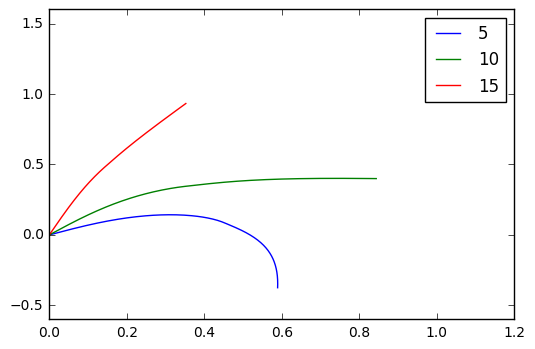

In [14]:
rank=5
x,y=leaf_shape_rank(rank=rank)
plot(x,y,label=rank)

rank=10
x,y=leaf_shape_rank(rank=rank)
plot(x,y,label=rank)

rank=15
x,y=leaf_shape_rank(rank=rank)
plot(x,y,label=rank)

xlim(0,1.2)
ylim(-0.6,1.6)
plt.legend(loc='best')
plt.show()

## I.5 Phyllotaxis

phyllotactic_angle

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


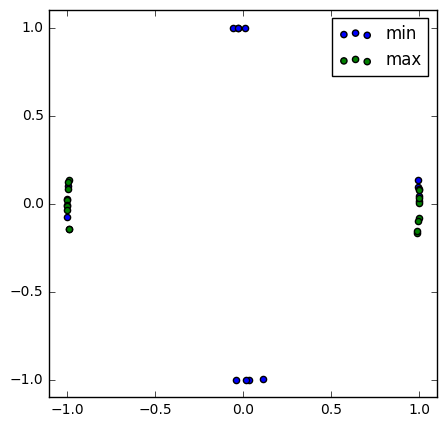

In [15]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

phytomer=16
phyllotactic_angle_min=90
phyllotactic_angle_max=180

az_min=leaf_azimuth(size=phytomer, phyllotactic_angle=phyllotactic_angle_min, phyllotactic_deviation=10, plant_orientation=0, spiral=True)*pi/180
az_max=leaf_azimuth(size=phytomer, phyllotactic_angle=phyllotactic_angle_max, phyllotactic_deviation=10, plant_orientation=0, spiral=True)*pi/180

x_min,y_min=pol2cart(rho=1,phi=az_min)
x_max,y_max=pol2cart(rho=1,phi=az_max)
    
%pylab inline
pylab.rcParams['figure.figsize'] = (5, 5)
#scatter(x,y,c=numpy.arange(phytomer))
scatter(x_min,y_min,c='blue',label='min')
scatter(x_max,y_max,c='green',label='max')
xlim(-1.1,1.1)
ylim(-1.1,1.1)
plt.legend(loc='best')
plt.show()

phyllotactic_deviation

Populating the interactive namespace from numpy and matplotlib


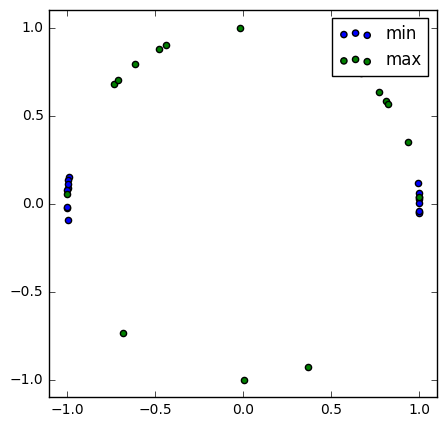

In [16]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

phytomer=16
phyllotactic_deviation_min=10
phyllotactic_deviation_max=90

az_min=leaf_azimuth(size=phytomer, phyllotactic_angle=180, phyllotactic_deviation=phyllotactic_deviation_min, plant_orientation=0, spiral=True)*pi/180
az_max=leaf_azimuth(size=phytomer, phyllotactic_angle=180, phyllotactic_deviation=phyllotactic_deviation_max, plant_orientation=0, spiral=True)*pi/180

x_min,y_min=pol2cart(rho=1,phi=az_min)
x_max,y_max=pol2cart(rho=1,phi=az_max)
    
%pylab inline
pylab.rcParams['figure.figsize'] = (5, 5)
#scatter(x,y,c=numpy.arange(phytomer))
scatter(x_min,y_min,c='blue',label='min')
scatter(x_max,y_max,c='green',label='max')
xlim(-1.1,1.1)
ylim(-1.1,1.1)
plt.legend(loc='best')
plt.show()

# II. Visualisation of 3D reconstructions and estimation of light interception

## II.1 Generate the mtg

In [7]:
g=generate_mtg(plant_area=8000,
               plant_height=156,
               rmax=0.355,
               skew=0.091,
               wl_int=0.08,
               wl_slp=0.01,
               w0_int=0.05,
               w0_slp=0.01,
               lm_int=0.5,
               lm_slp=-0.02,
               incli_base=72,
               incli_top=19.6,
               infl=41.6,
               pos_l=0.6,
               plant_orientation=0,
               phyllotactic_angle=172.704,
               phyllotactic_deviation=24,
               nb_leaf_segment=10,
               phytomer=16,
               stage=None,
               seed=1)

## II.2 Illuminate the 3D plant 

### Argument for ligh illumination

In [8]:
plant_irradiance(g, isolated=True, density=9, clear_sky=False, daydate='2000-06-21', longitude=3.52, latitude=43.36,
               altitude=56, timezone="Europe/Paris")

{'Area': 0.86687380840000006,
 'Area_leaf': 0.79110522549999995,
 'Ei': 0.6667418702280955,
 'Ei_leaf': 0.70179408109220176}

## II.3 Visualisation

In [10]:
%gui qt4
from TD_maize import display

Raw visualisation

In [11]:
display(g,light=False)

Visualisation with irradiance

In [12]:
display(g,light=True, isolated=True, density=9, clear_sky=False, daydate='2000-06-21', longitude=3.52, latitude=43.36,
               altitude=56, timezone="Europe/Paris")

# III. Run simulation for sensitivity analysis


In [13]:
input='planMorris_area4000_s16_d9.csv'
output='res_planMorris_area4000_s16_d9_isol.csv'

process(path_input=input, path_output=output, nb_process=4, isolated=True)

run_sim_xrun : 0 / 360
run_sim_xrun : 1 / 360
run_sim_xrun : 2 / 360
run_sim_xrun : 3 / 360
run_sim_xrun : 4 / 360
run_sim_xrun : 5 / 360
run_sim_xrun : 6 / 360
run_sim_xrun : 7 / 360
run_sim_xrun : 8 / 360
run_sim_xrun : 9 / 360
run_sim_xrun : 10 / 360
run_sim_xrun : 11 / 360
run_sim_xrun : 12 / 360
run_sim_xrun : 13 / 360
run_sim_xrun : 14 / 360
run_sim_xrun : 15 / 360
run_sim_xrun : 16 / 360
run_sim_xrun : 17 / 360
run_sim_xrun : 18 / 360
run_sim_xrun : 19 / 360
run_sim_xrun : 20 / 360
run_sim_xrun : 21 / 360
run_sim_xrun : 22 / 360
run_sim_xrun : 23 / 360
run_sim_xrun : 24 / 360
run_sim_xrun : 25 / 360
run_sim_xrun : 26 / 360
run_sim_xrun : 27 / 360
run_sim_xrun : 28 / 360
run_sim_xrun : 29 / 360
run_sim_xrun : 30 / 360
run_sim_xrun : 31 / 360
run_sim_xrun : 32 / 360
run_sim_xrun : 33 / 360
run_sim_xrun : 34 / 360
run_sim_xrun : 35 / 360
run_sim_xrun : 36 / 360
run_sim_xrun : 37 / 360
run_sim_xrun : 38 / 360
run_sim_xrun : 39 / 360
run_sim_xrun : 40 / 360
run_sim_xrun : 41 / 360
ru

run_sim_xrun : 333 / 360
run_sim_xrun : 334 / 360
run_sim_xrun : 335 / 360
run_sim_xrun : 336 / 360
run_sim_xrun : 337 / 360
run_sim_xrun : 338 / 360
run_sim_xrun : 339 / 360
run_sim_xrun : 340 / 360
run_sim_xrun : 341 / 360
run_sim_xrun : 342 / 360
run_sim_xrun : 343 / 360
run_sim_xrun : 344 / 360
run_sim_xrun : 345 / 360
run_sim_xrun : 346 / 360
run_sim_xrun : 347 / 360
run_sim_xrun : 348 / 360
run_sim_xrun : 349 / 360
run_sim_xrun : 350 / 360
run_sim_xrun : 351 / 360
run_sim_xrun : 352 / 360
run_sim_xrun : 353 / 360
run_sim_xrun : 354 / 360
run_sim_xrun : 355 / 360
run_sim_xrun : 356 / 360
run_sim_xrun : 357 / 360
run_sim_xrun : 358 / 360
run_sim_xrun : 359 / 360
run_sim_xrun : 360 / 360


,Area,Area_leaf,Ei,Ei_leaf,incli_base,incli_top,infl,isolated,lm_slp,phyllotactic_angle,phyllotactic_deviation,plant_height,rmax,skew,w0_slp,wl_slp
0,0.764259,0.695760,0.701483,0.743244,86.25,23.0,40.0,1.0,-0.020,233.87,25.5,140.0,0.575,0.100,0.0070,0.00595
1,0.764259,0.695760,0.699158,0.740495,86.25,23.0,40.0,1.0,-0.020,233.87,34.5,140.0,0.575,0.100,0.0070,0.00595
2,0.764259,0.695760,0.689295,0.730163,86.25,23.0,40.0,1.0,-0.020,233.87,34.5,140.0,0.575,0.100,0.0070,0.00805
3,0.764330,0.695831,0.688954,0.729807,86.25,17.0,40.0,1.0,-0.020,233.87,34.5,140.0,0.575,0.100,0.0070,0.00805
4,0.764330,0.695831,0.657648,0.694885,86.25,17.0,40.0,1.0,-0.020,179.90,34.5,140.0,0.575,0.100,0.0070,0.00805
5,0.764306,0.695807,0.655823,0.692860,86.25,17.0,40.0,1.0,-0.020,179.90,34.5,140.0,0.575,0.130,0.0070,0.00805
6,0.764486,0.695987,0.643434,0.680050,86.25,17.0,28.0,1.0,-0.020,179.90,34.5,140.0,0.575,0.130,0.0070,0.00805
7,0.764005,0.695506,0.640108,0.677044,63.75,17.0,28.0,1.0,-0.020,179.90,34.5,140.0,0.575,0.130,0.0070,0.00805
8,0.764287,0.695788,0.638807,0.675681,63.75,17.0,28.0,1.0,-0.020,179.90,34.5,140.0,0.575,0.130,0.0100,0.00805
9,0.764434,0.695934,0.620171,0.654869,63.75,17.0,28.0,1.0,-0.020,179.90,34.5,140.0,0.425,0.130,0.0100,0.00805
